In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
import pickle
from sklearn.model_selection import train_test_split as tts

Using TensorFlow backend.
/home/slcf/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

In [3]:
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [4]:
n_points = 3000
X,color = datasets.samples_generator.make_s_curve(n_points,random_state=0)


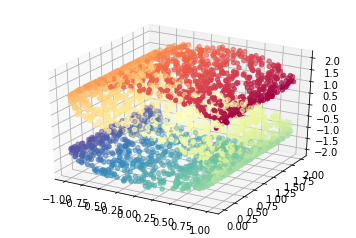

In [5]:
fig = plt.figure()
#plt.suptitle("Manifold Learning with %i points, %i neighbors"
#             % (1000, n_neighbors), fontsize=14)

#ax = fig.add_subplot(251, projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
#ax.view_init(4, -72)
plt.show()

In [6]:
xtrain,xtest,ytrain,ytest = tts(X,color,test_size = 0.3)

## Manifold Learning (Hessian LLE)

In [22]:
x_lle = manifold.LocallyLinearEmbedding(10,2,eigen_solver = 'auto',
                                       method = 'ltsa').fit_transform(xtest)


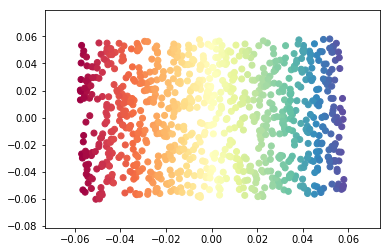

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_lle[:,0],x_lle[:,1],c=ytest,cmap=plt.cm.Spectral)
plt.show()

In [7]:
import sys
sys.path.append('../')
from mnist_dae import *
from toy_dae import *

In [8]:
xtrain.shape[1]

3

In [52]:
toy_dae = Toy_DAE(xtrain,noise_type = "gaussian",noise_scale = 0.3,dims=[2000])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 2000)              8000      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 6003      
Total params: 14,003
Trainable params: 14,003
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
toy_dae.train_dae()

loss type is  mean_squared_error
train the DAE model with noise  gaussian  ( 0.3 )
Train on 1470 samples, validate on 630 samples
Epoch 1/30
1470/1470 [==============================] - 0s 61us/step - loss: 0.6646 - val_loss: 0.2748
Epoch 2/30
1470/1470 [==============================] - 0s 26us/step - loss: 0.1820 - val_loss: 0.1069
Epoch 3/30
1470/1470 [==============================] - 0s 27us/step - loss: 0.0947 - val_loss: 0.0829
Epoch 4/30
1470/1470 [==============================] - 0s 27us/step - loss: 0.0827 - val_loss: 0.0808
Epoch 5/30
1470/1470 [==============================] - 0s 27us/step - loss: 0.0812 - val_loss: 0.0804
Epoch 6/30
1470/1470 [==============================] - 0s 27us/step - loss: 0.0809 - val_loss: 0.0805
Epoch 7/30
1470/1470 [==============================] - 0s 28us/step - loss: 0.0808 - val_loss: 0.0796
Epoch 8/30
1470/1470 [==============================] - 0s 30us/step - loss: 0.0806 - val_loss: 0.0800
Epoch 9/30
1470/1470 [========================

In [54]:
_,x_crr = corrupt_toy(xtest,noise_type='gaussian',scale = 0.3)

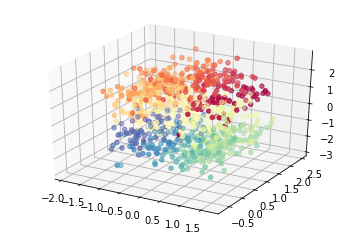

In [55]:
fig = plt.figure()
#plt.suptitle("Manifold Learning with %i points, %i neighbors"
#             % (1000, n_neighbors), fontsize=14)

#ax = fig.add_subplot(251, projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_crr[:, 0], x_crr[:, 1], x_crr[:, 2], c=ytest, cmap=plt.cm.Spectral)
#ax.view_init(4, -72)
plt.show()

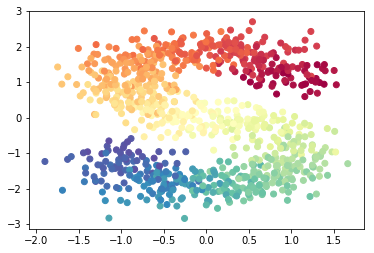

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_crr[:,0],x_crr[:,2],c=ytest,cmap=plt.cm.Spectral)
plt.show()

In [57]:
x_crr_lle = manifold.LocallyLinearEmbedding(10,2,eigen_solver = 'auto',
                                       method = 'ltsa').fit_transform(x_crr)


/home/slcf/.pyenv/versions/keras36/lib/python3.6/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 293 is exactly zero. Singular matrix.
  RuntimeWarning)


In [61]:
x_ds = toy_dae.apply_DS(x_crr,vr=0,max_iter=3)
#x_ds = toy_dae.predict(x_crr)

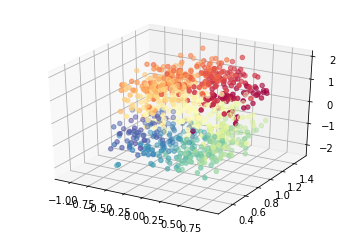

In [62]:
fig = plt.figure()
#plt.suptitle("Manifold Learning with %i points, %i neighbors"
#             % (1000, n_neighbors), fontsize=14)
#ax = fig.add_subplot(251, projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ds[:, 0], x_ds[:, 1], x_ds[:, 2], c=ytest, cmap=plt.cm.Spectral)
#ax.view_init(4, -72)
plt.show()

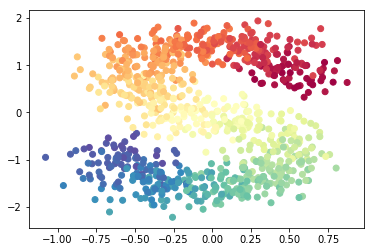

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_ds[:,0],x_ds[:,2],c=ytest,cmap=plt.cm.Spectral)
plt.show()

## Explicit Autoencoder